# Import librairies

In [86]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Create data

In [2]:
spot_init=100                      #S0 qui est aussi le prix d'exercie

int_rate = 2/100                   #Taux d'interet sans risque
volatility=15/100                  #Volatilité historique
maturity=1                         #maturité en année
nb_step=12                         #Décomposition de l'année en mois
time_step = maturity/nb_step       #delta
nb_path=20                         #Nombre de trajectoires
nb_seed=20191008

In [3]:
drift_mod = (int_rate-0.5*volatility**2)*time_step
mat_drift = drift_mod*np.cumsum(np.ones((nb_path,nb_step)),axis=1)

In [4]:
volat_mod = volatility*np.sqrt(time_step)


In [5]:
np.random.seed(nb_seed)

In [6]:
mat_shock = np.random.standard_normal((nb_path,nb_step))

In [7]:
mat_shock_cum = np.cumsum(mat_shock,axis=1)

In [8]:
mat_volatility = volat_mod*mat_shock_cum

In [9]:
mat_volatility.shape

(20, 12)

In [10]:
mat_log_spot= mat_drift + mat_volatility


In [11]:
mat_spot_init = spot_init*np.ones((nb_path,nb_step))

In [12]:
mat_spot_fut = mat_spot_init*np.exp(mat_log_spot)

In [13]:
vec_spot_init = spot_init*np.ones((nb_path,1))

In [14]:
mat_path_spot_fut = np.concatenate((vec_spot_init,np.round(mat_spot_fut,3)),axis=1)

In [15]:
mat_path_spot_fut.shape

(20, 13)

In [177]:
print("20 trajectoires du spot pour un an (13 pas)")
df_spot = pd.DataFrame(mat_path_spot_fut)
np.round(df_spot,3).add_prefix('temps_').set_index('trajectoire_' + df_spot.index.astype(str))

20 trajectoires du spot pour un an (13 pas)


,temps_0,temps_1,temps_2,temps_3,temps_4,temps_5,temps_6,temps_7,temps_8,temps_9,temps_10,temps_11,temps_12
trajectoire_0,100.0,96.217,94.804,92.972,94.336,100.207,98.783,105.671,114.904,117.715,108.745,106.763,101.060
trajectoire_1,100.0,100.255,98.843,96.419,87.737,88.071,80.193,79.617,72.863,70.423,71.093,68.658,72.335
trajectoire_2,100.0,92.977,93.200,98.233,96.448,90.172,96.604,99.474,103.680,108.957,115.239,121.766,120.964
trajectoire_3,100.0,103.328,104.628,103.017,104.118,104.356,98.255,99.214,97.686,90.776,87.869,92.360,98.698
trajectoire_4,100.0,97.092,87.424,85.111,84.290,85.676,79.933,85.140,82.265,85.025,85.433,84.650,89.611
trajectoire_5,100.0,101.153,100.056,94.879,94.155,86.617,88.317,87.081,86.166,85.632,86.074,88.473,95.124
trajectoire_6,100.0,98.820,98.829,95.025,96.193,95.001,104.095,105.520,114.331,111.126,107.262,111.020,116.898
trajectoire_7,100.0,102.279,101.214,103.897,105.819,102.648,101.251,93.887,96.596,100.591,98.146,94.079,100.339
trajectoire_8,100.0,93.826,96.729,95.890,93.335,92.008,102.422,101.627,95.585,89.710,91.648,94.863,90.460
trajectoire_9,100.0,98.075,106.112,109.313,105.564,113.913,119.491,116.376,109.115,111.004,107.928,107.214,99.332


In [17]:
def vol_maltz(strike, spot, int_rate, time_to_maturity):
    
    """Arguments: 
                - strike (float): prix d'exercice 
                - spot (float): prix du sous jacent à l'instant t
                - int_rate (float) : taux d'intêret de l'actif sans risque
                - time_to_maturity (float): le temps restant avant d'arriver à la maturité
        Return:
                - (float) le maximum entre 5% et la volatilité implicite de Maltz"""
    
    sigma0 = 0.15
    alpha1 = 0.58
    alpha2 = -0.35
    a = np.log(spot * np.exp(int_rate * time_to_maturity) / strike) / np.sqrt(time_to_maturity)
    vol = sigma0 + alpha1 * a + alpha2 * a**2
    return max(0.05, vol)
    

In [18]:
def psi(N, Ci):
    
    """Arguments:
                - N (float): nombre de calls
                - Ci (float): prix du call à l'instant i
        Return:
                - (float) les frais de transaction pour le produit dérivé  """     
    
    return 0.2 * 10**(-2) * N * Ci

In [19]:
def phi(Ci):
    
    """Arguments:
                - Ci (float): prix du call à l'instant i
        Return:
                - (float) les frais de transaction pour le sous jacent  """ 
    
    return 0.5 * 10**(-2) * Ci

# Question 1

In [20]:
def call_price_t(spot, strike, int_rate, time_to_maturity):
    
     """Arguments: 
                - strike (float): prix d'exercice 
                - spot (float): prix du sous jacent à l'instant t
                - int_rate (float) : taux d'intêret de l'actif sans risque
                - time_to_maturity (float): le temps restant avant d'arriver à la maturité
        Return:
                - (float) le prix du call à l'instant t"""
        
    if time_to_maturity == 0:
        return(max(spot - strike, 0))
    else :
        exp_rate = np.exp(-int_rate * time_to_maturity)
        volatility = vol_maltz(strike, spot, int_rate, time_to_maturity)
        vol_mod = volatility*np.sqrt(time_to_maturity)
        d1 = (np.log(spot/strike) + (int_rate + 0.5 * volatility**2) * time_to_maturity)
        d1 = d1 / vol_mod
        d2 = d1 - vol_mod
        Nd1 = norm.cdf(d1)
        Nd2 = norm.cdf(d2)
        price = spot * Nd1 - strike * exp_rate * Nd2
        return price
    

In [21]:
mat_call_price = np.zeros(((nb_path,nb_step + 1)))
mat_call_price.shape


(20, 13)

In [22]:
strike = spot_init

for j in range(mat_call_price.shape[0]):
    for t in range(mat_call_price.shape[1]):
        spot = mat_path_spot_fut[j,t]
        time_to_maturity = nb_step - t
        mat_call_price[j,t] = call_price_t(spot, strike, int_rate,time_to_maturity)
        mat_call_price[j,t] = round(mat_call_price[j,t],2)


In [23]:
mat_call_price

array([[3.500e+01, 2.968e+01, 2.649e+01, 2.289e+01, 2.203e+01, 2.502e+01,
        2.143e+01, 2.505e+01, 3.073e+01, 3.033e+01, 1.883e+01, 1.315e+01,
        1.060e+00],
       [3.500e+01, 3.336e+01, 3.014e+01, 2.595e+01, 1.639e+01, 1.460e+01,
        6.610e+00, 4.360e+00, 3.300e-01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.500e+01, 2.676e+01, 2.506e+01, 2.757e+01, 2.389e+01, 1.633e+01,
        1.954e+01, 1.957e+01, 2.058e+01, 2.233e+01, 2.473e+01, 2.692e+01,
        2.096e+01],
       [3.500e+01, 3.620e+01, 3.544e+01, 3.191e+01, 3.078e+01, 2.875e+01,
        2.097e+01, 1.934e+01, 1.540e+01, 7.170e+00, 2.600e+00, 2.080e+00,
        0.000e+00],
       [3.500e+01, 3.047e+01, 2.001e+01, 1.617e+01, 1.357e+01, 1.267e+01,
        6.440e+00, 8.000e+00, 3.970e+00, 3.420e+00, 1.440e+00, 1.000e-02,
        0.000e+00],
       [3.500e+01, 3.419e+01, 3.124e+01, 2.458e+01, 2.187e+01, 1.342e+01,
        1.263e+01, 9.420e+00, 6.450e+00, 3.770e+00, 1.710e+00, 4.700e-01,
        0.00

# Question 2

In [25]:
mat_call_price.shape

(20, 13)

In [179]:
time_step = 1/12

In [143]:
N = 10000
pnl_wo_cov = np.zeros(nb_path)

for i in range(nb_path):
    
    b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0])
    b = [b0]
    pnl_wo_cov[i] = N * (mat_call_price[i,0] - mat_call_price[i,-1]) + int_rate * time_step * b0
    
    for j in range(1, 12):
        
        bm = N * (mat_call_price[i,j-1] - mat_call_price[i,j]) + int_rate * time_step * b[-1]
        b.append(bm)
        pnl_wo_cov[i] += int_rate * time_step * bm
        
    if strike < mat_path_spot_fut[i,-1]:
        
        pnl_wo_cov[i] -= (phi(N  * strike) + N * mat_path_spot_fut[i,-1] + phi(N * mat_path_spot_fut[i,-1]))
        pnl_wo_cov[i] = round(pnl_wo_cov[i], 2)
        
    else:
        
        pnl_wo_cov[i] = round(pnl_wo_cov[i], 2)

In [144]:
pnl_wo_cov

array([ -669689.37,   364271.43, -1071501.51,   363844.43,   364263.39,
         364170.28,  -988017.5 ,  -653193.74,   363531.29,   361487.05,
         364270.28,   364271.3 ,   364216.11,   363123.79,   364267.25,
       -1044785.91,  -926647.8 ,  -691448.74,  -762361.3 , -1174112.72])

# Question 3

In [145]:
def delta( time_to_maturity, spot ):
    
     """Arguments: 
                - spot (float): prix du sous jacent à l'instant t
                - time_to_maturity (float): le temps restant avant d'arriver à la maturité
        Return:
                - (float) le delta du call"""
        
    if time_to_maturity == 0:
        
        if spot > strike:
            return 1
        else: 
            return 0
        
    else :
        
        volatility = vol_maltz(strike, spot, int_rate, time_to_maturity)
        vol_mod = volatility*np.sqrt(time_to_maturity)
        d1 = (np.log(spot/strike) + (int_rate + 0.5 * volatility**2) * time_to_maturity)
        d1 = d1 / vol_mod
        Nd1 = norm.cdf(d1)
        
        return Nd1

In [169]:
mat_delta = np.zeros((nb_path,nb_step+1))
mat_delta.shape

(20, 13)

In [170]:
mat_path_spot_fut.shape

(20, 13)

In [171]:
strike = spot_init

for j in range(mat_delta.shape[0]):
    
    for t in range(mat_delta.shape[1] ):
        
        spot = mat_path_spot_fut[j,t]
        time_to_maturity = nb_step - t
        mat_delta[j,t] = delta(time_to_maturity, spot)
        mat_delta[j,t] = round(mat_delta[j,t],3)
        
mat_delta

array([[0.756, 0.727, 0.706, 0.679, 0.674, 0.704, 0.679, 0.719, 0.768,
        0.782, 0.72 , 0.703, 1.   ],
       [0.756, 0.748, 0.731, 0.704, 0.613, 0.593, 0.431, 0.357, 0.071,
        0.   , 0.   , 0.   , 0.   ],
       [0.756, 0.707, 0.695, 0.716, 0.691, 0.617, 0.66 , 0.669, 0.692,
        0.725, 0.771, 0.833, 1.   ],
       [0.756, 0.763, 0.76 , 0.743, 0.74 , 0.731, 0.675, 0.667, 0.632,
        0.486, 0.314, 0.322, 0.   ],
       [0.756, 0.732, 0.65 , 0.607, 0.573, 0.562, 0.426, 0.479, 0.351,
        0.339, 0.222, 0.006, 0.   ],
       [0.756, 0.753, 0.737, 0.693, 0.673, 0.575, 0.568, 0.514, 0.446,
        0.357, 0.247, 0.128, 0.   ],
       [0.756, 0.741, 0.731, 0.694, 0.689, 0.663, 0.719, 0.718, 0.765,
        0.741, 0.705, 0.753, 1.   ],
       [0.756, 0.758, 0.744, 0.748, 0.749, 0.72 , 0.699, 0.611, 0.619,
        0.644, 0.582, 0.396, 1.   ],
       [0.756, 0.712, 0.718, 0.7  , 0.666, 0.636, 0.707, 0.688, 0.606,
        0.462, 0.435, 0.427, 0.   ],
       [0.756, 0.737, 0.767,

# Question 4

In [172]:
mat_delta.shape

(20, 13)

In [181]:
mat_titre = np.zeros((nb_path,nb_step))

for t in range( nb_step):
    mat_titre[:,t] = N * mat_delta[:,t]
    mat_titre[:,t] = np.round(mat_titre[:,t], 0)

mat_titre

array([[7560., 7270., 7060., 6790., 6740., 7040., 6790., 7190., 7680.,
        7820., 7200., 7030.],
       [7560., 7480., 7310., 7040., 6130., 5930., 4310., 3570.,  710.,
           0.,    0.,    0.],
       [7560., 7070., 6950., 7160., 6910., 6170., 6600., 6690., 6920.,
        7250., 7710., 8330.],
       [7560., 7630., 7600., 7430., 7400., 7310., 6750., 6670., 6320.,
        4860., 3140., 3220.],
       [7560., 7320., 6500., 6070., 5730., 5620., 4260., 4790., 3510.,
        3390., 2220.,   60.],
       [7560., 7530., 7370., 6930., 6730., 5750., 5680., 5140., 4460.,
        3570., 2470., 1280.],
       [7560., 7410., 7310., 6940., 6890., 6630., 7190., 7180., 7650.,
        7410., 7050., 7530.],
       [7560., 7580., 7440., 7480., 7490., 7200., 6990., 6110., 6190.,
        6440., 5820., 3960.],
       [7560., 7120., 7180., 7000., 6660., 6360., 7070., 6880., 6060.,
        4620., 4350., 4270.],
       [7560., 7370., 7670., 7730., 7470., 7790., 7960., 7790., 7330.,
        7410., 7120.

# Question 5

In [182]:
pnl_covered = np.zeros(nb_path)

In [183]:
for i in range(nb_path):
    
    b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0]) - (mat_titre[i,0] * mat_path_spot_fut[i,0] + phi(mat_titre[i,0] * mat_path_spot_fut[i,0]))
    b = [b0]
    pnl_covered[i] = N * (mat_call_price[i,0] - mat_call_price[i,-1]) + int_rate * time_step * b0 + mat_titre[i,0] * (mat_path_spot_fut[i,1] - mat_path_spot_fut[i,0])
    
    for j in range(1, 12):
        
        bm = N * (mat_call_price[i,j-1] - mat_call_price[i,j]) + int_rate * time_step * b[-1] +  mat_titre[i,j-1] * (mat_path_spot_fut[i,j] - mat_path_spot_fut[i,j-1])
        bm += (mat_path_spot_fut[i,j] * ( mat_titre[i,j-1] -  mat_titre[i,j]) - phi(np.abs(mat_titre[i,j-1] -  mat_titre[i,j]) * mat_path_spot_fut[i,j] ))
        b.append(bm)
        pnl_covered[i] += (int_rate * time_step * bm + mat_titre[i,j] * (mat_path_spot_fut[i,j+1] - mat_path_spot_fut[i,j]))
    
    if strike < mat_path_spot_fut[i,-1]:
       
        pnl_covered[i] -= (phi(N  * strike) + ( N - mat_titre[i,-2])  * mat_path_spot_fut[i,-1] + phi((N - mat_titre[i,-2]) * mat_path_spot_fut[i,-1]))
        pnl_covered[i] = round(pnl_covered[i], 2)
    
    else :
        
        pnl_covered[i] -= phi( mat_titre[i,-2] * mat_path_spot_fut[i,-1])
        pnl_covered[i] = round(pnl_covered[i], 2)
                          
                        

In [184]:
pnl_covered

array([  47064.07,  190149.83,   -3704.7 ,  310049.73,  230687.3 ,
        267723.33,  -56220.22,  -94697.99,  277104.54,  341095.45,
        222566.93,  198814.22,  270099.29,  319205.87,  227768.95,
         20763.16,  -18152.59, -153248.63,   -9622.58, -134496.45])

Text(0.5, 1.0, 'PnL')

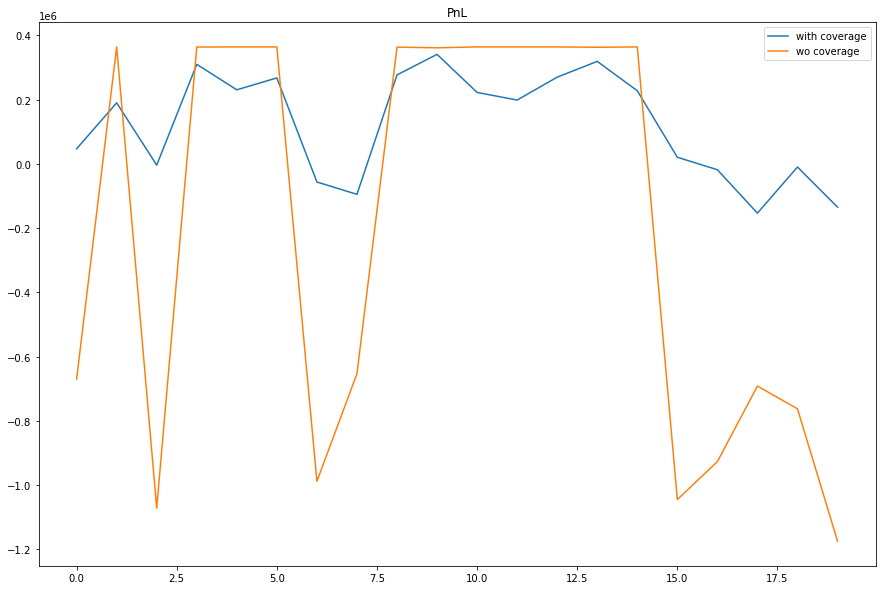

In [185]:
plt.figure(figsize = (15,10))
plt.plot(pnl_covered)
plt.plot(pnl_wo_cov)
plt.legend(['with coverage','wo coverage'])
plt.title('PnL')

# Question 6

In [155]:
mat_titre_max = np.zeros((nb_path, nb_step))

In [224]:
alpha1 = alpha2 = 0.01

for j in range(mat_titre_max.shape[0]):
    
    esp_c1 = (1/nb_path) * np.sum( mat_call_price[:,1] )
    esp_s1 = (1/nb_path) * np.sum( mat_path_spot_fut[:,1])
    maxi = - np.inf
    C0 = mat_call_price[j,0]
    S0 = mat_path_spot_fut[j,0]
    N0 = 1
    
    for n0 in range(1,N):
        
        esp = N * (C0 - esp_c1 ) + n0 * (esp_s1 - S0) + int_rate * time_step * ( N * C0 - psi(N, C0) - n0 * S0 - phi(n0 * S0) )
        
        if esp > maxi:
            
            N0 = n0
            maxi = esp
            
    mat_titre_max[j,0] = int(N0)
    
    
      
    b0 = N * C0 - psi(N, C0) - ( mat_titre_max[j,0] * S0 + phi(mat_titre_max[j,0] * S0))
    b1 = N * (C0 - mat_call_price[j,1]) + mat_titre_max[j,0] * (mat_path_spot_fut[j,1] - S0) + int_rate*time_step*b0
    bm = [b0, b1]
    
    for t in range(1,mat_titre_max.shape[1] - 1):
        
        ksi = 0.1
        somme = np.sum([np.exp( - ksi * np.abs(mat_path_spot_fut[k,t + 1] - mat_path_spot_fut[j,t + 1] )) for k in range(nb_path)])
        proba = [np.exp( - ksi * np.abs(mat_path_spot_fut[l,t + 1] - mat_path_spot_fut[j,t + 1] )) / somme for l in range(nb_path)]
        
        
        esp_s = np.sum([s * p  for (s,p) in zip(mat_path_spot_fut[:,t + 1],proba)])
        esp_c = np.sum([c * p  for (c,p) in zip(mat_call_price[:,t + 1],proba)])
        
        S =  mat_path_spot_fut[j,t]
        
        maxi = -np.inf
        Nm = 1

        for k in range(1,N):

            #if np.abs(int_rate * time_step * bm[t] - N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S)) <= alpha2 * N * mat_call_price[j,t]:

            esp = -N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S) + int_rate * time_step * (bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs(mat_titre_max[j,t-1] - k) * S))

            if esp > maxi :

                maxi = esp

                Nm = k

        mat_titre_max[j,t] = int(Nm)
        
        
        """
        if esp_s - S == 0:
            
            maxi = -np.inf
            Nm = 1
            
            for k in range(1, N):
                
                #if np.abs(bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs((mat_titre_max[j,t-1] - k) * S)) ) <= alpha1 * S * mat_titre_max[j,t-1]:  
                
                esp = -N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S) + int_rate * time_step * (bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs(mat_titre_max[j,t-1] - k) * S))

                if esp > maxi :

                    maxi = esp
                    Nm = k

            mat_titre_max[j,t] = int(Nm)
            
        else:
            
            maxi = -np.inf
            Nm = 1
            
            for k in range(1,N):
                
                #if np.abs(int_rate * time_step * bm[t] - N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S)) <= alpha2 * N * mat_call_price[j,t]:
                
                esp = -N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S) + int_rate * time_step * (bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs(mat_titre_max[j,t-1] - k) * S))

                if esp > maxi :

                    maxi = esp

                    Nm = k

            mat_titre_max[j,t] = int(Nm)
            """
        
        b = bm[t] + (mat_titre_max[j,t-1] - mat_titre_max[j,t])*mat_path_spot_fut[j,t] - phi(np.abs(mat_titre_max[j,t-1] - mat_titre_max[j,t])*mat_path_spot_fut[j,t])
        bm.append(N * (mat_call_price[j,t] - mat_call_price[j,t+1]) + mat_titre_max[j,t]  * (mat_path_spot_fut[j,t + 1] - mat_path_spot_fut[j,t]) + int_rate*time_step*b)

    somme = np.sum([np.exp( - ksi * np.abs(mat_path_spot_fut[k,-1] - mat_path_spot_fut[j,-1] )) for k in range(nb_path)])
    proba = [np.exp( - ksi * np.abs(mat_path_spot_fut[l,-1] - mat_path_spot_fut[j,-1] )) / somme for l in range(nb_path)]

    esp_s = np.sum([s * p  for (s,p) in zip(mat_path_spot_fut[:,-1],proba)])
    esp_c = np.sum([c * p  for (c,p) in zip(mat_call_price[:,-1],proba)])
    
    maxi = - np.inf
    C = mat_call_price[j,-2]
    S = mat_path_spot_fut[j,-2]
    Nm = 1
    
    for n in range(1,N):
        
        esp_inf = np.sum([phi(n * mat_path_spot_fut[l,-1] ) * p if mat_path_spot_fut[l,-1] < strike else 0 for (l,p) in zip(range(nb_path),proba)])
        esp_sup = np.sum([phi(N * strike ) + (N - n) * mat_path_spot_fut[l,-1] + phi(mat_path_spot_fut[l,-1] * (N - n)) if mat_path_spot_fut[l,-1] > strike else 0 for (l,p) in zip(range(nb_path),proba)]) 
        
        esp = N * (C - esp_c) + n * (esp_s - S) + int_rate * time_step * (bm[-1] + (mat_titre_max[j,-2] - n) * mat_path_spot_fut[j,-1] - phi(np.abs(mat_titre_max[j,-2] - n) * mat_path_spot_fut[j,-1])) - esp_inf - esp_sup
        
        if esp > maxi:
            
            maxi = esp
            Nm = n
        
        mat_titre_max[j,-1] = int(Nm)

In [225]:
mat_titre_max

array([[1.000e+00, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 1.000e+00,
        9.999e+03, 9.999e+03, 1.000e+00, 1.000e+00, 1.000e+00, 9.999e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.999e+03, 1.000e+00,
        9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03],
       [1.000e+00, 9.999e+03, 9.999e+03, 1.000e+00, 1.000e+00, 9.999e+03,
        9.999e+03, 9.999e+03, 9.999e+03, 1.000e+00, 1.000e+00, 9.999e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.999e+03, 9.999e+03],
       [1.000e+00, 1.000e+00, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03,
        9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.999e+03,
        9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03, 9.999e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 9.999e+03, 1.000e+00, 9.999e+03,
        1.000e+00, 9.999e+03, 1.

In [212]:
def conditional_prob(spot,scenario_index,κ):
    """
    param spot:
    param index:
    param κ:
    
    output
    probabilities for the scenario index
    """
    expo_ = np.exp(-κ * abs(spot - spot[scenario_index]))
    num_ = expo_.sum()
    
    return expo_/num_

In [213]:
def strategy(spot, call_prices, N, int_rate, time_step, fees_udl, fees_drv):
    """
    param spot: spot prices function of time and scenarios
    param call_prices: call prices function of time and scenarios
    param N: number of calls
    param int_rate: interest rate
    param time_step: time between to hedges
    param fees_udl: proportional transaction fees for underlying
    param fees_drv: proportional transaction fees for derivatives
    
    output:
    number of underlying to by indorder to maximise the PnL
    """
    
    nb_steps = np.shape(spot)[1]
    nb_path = np.shape(spot)[0]
    
    nb_udl_hedge = np.zeros((nb_path, nb_steps-1))
    expected_call_prices = np.zeros((nb_path, nb_steps))
    expected_call_prices[:,0] = call_prices[:,0]
    expected_spot_price = np.zeros((nb_path, nb_steps))
    expected_spot_price[:,0] = spot[:,0]
    
    
    for t in range(0,nb_steps-1):
        mean_PnL = 0
        for path in range(nb_path):
            probabilities = conditional_prob(spot[:,t], path, 1) # κ=1 ???
            expected_call_prices[path,t+1] = (call_prices[:,t+1] * probabilities).sum() 
            expected_spot_price[path,t+1] = (spot[:,t+1] * probabilities).sum()
        
        # PnL maximisation
        #maxi = np.array([-1 * np.inf for j in range(nb_path)])
        my_maxi = np.ones((nb_path,N-1)) * np.inf * (-1)
        for i in range(1,N): # On doit détenir au moins un titre et au plus N-1 
            # number of underlying to buy already calculated 
            nb_udl_hedge_test = nb_udl_hedge[:,:t+2].copy()
            nb_udl_hedge_test[:,t] = i # + the one to test
            # PnL in this test b
            PnL = PnL_hedging(expected_spot_price[:,:t+2], expected_call_prices[:,:t+2], 
                              nb_udl_hedge_test, int_rate, time_step, N,fees_udl,fees_drv, is_maturity=t==nb_steps-2)
            my_maxi[:,i-1] = PnL

        for sc in range(nb_path):
            nb_udl_hedge[sc,t] = my_maxi[sc].argmax(axis=0)+1
                    
                    
        # actualiser expected spot and call prices en mettant les valeurs effectives et plus expected 
        expected_call_prices[:,t+1] = call_prices[:,t+1]
        expected_spot_price[:,t+1] = spot[:,t+1]        
                    
    return(nb_udl_hedge)

# Question 7

In [204]:
pnl_covered_max = np.zeros(nb_path)

In [205]:
for i in range(nb_path):
    b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0]) - (mat_titre_max[i,0] * mat_path_spot_fut[i,0] + phi(mat_titre_max[i,0] * mat_path_spot_fut[i,0]))
    b = [b0]
    pnl_covered[i] = N * (mat_call_price[i,0] - mat_call_price[i,-1]) + int_rate * time_step * b0 + mat_titre_max[i,0] * (mat_path_spot_fut[i,1] - mat_path_spot_fut[i,0])
    for j in range(1, 12):
        bm = N * (mat_call_price[i,j-1] - mat_call_price[i,j]) + int_rate * time_step * b[-1] +  mat_titre_max[i,j-1] * (mat_path_spot_fut[i,j] - mat_path_spot_fut[i,j-1])
        bm += (mat_path_spot_fut[i,j] * ( mat_titre_max[i,j-1] -  mat_titre_max[i,j]) - phi(np.abs(mat_titre_max[i,j-1] -  mat_titre_max[i,j]) * mat_path_spot_fut[i,j] ))
        b.append(bm)
        pnl_covered__max[i] += (int_rate * time_step * bm + mat_titre_max[i,j] * (mat_path_spot_fut[i,j+1] - mat_path_spot_fut[i,j]))
    if strike < mat_path_spot_fut[i,-1]:
        pnl_covered__max[i] -= (phi(N  * strike) + ( N - mat_titre_max[i,-2])  * mat_path_spot_fut[i,-1] + phi((N - mat_titre_max[i,-2]) * mat_path_spot_fut[i,-1]))
        pnl_covered__max[i] = round(pnl_covered__max[i], 2)
    else :
        pnl_covered__max[i] -= phi( mat_titre_max[i,-2] * mat_path_spot_fut[i,-1])
        pnl_covered__max[i] = round(pnl_covered__max[i], 2)
                          
                        

In [206]:
pnl_covered__max

array([-1.18721334e+045,  3.84306563e+013, -5.03392486e+163,
        8.65759869e+256,  2.07511595e+033, -1.42347341e+075,
        2.96881511e+206,  8.31329207e+277,  9.59044251e+058,
        1.36817106e+245,  2.86450315e+026, -2.61964121e+078,
        5.94499520e+036,  4.17174880e+247, -3.83588495e+008,
       -4.65871784e+164, -3.03294041e+243,  3.91605511e+221,
       -6.99445772e+250, -1.50887715e+076])

Text(0.5, 1.0, 'PnL')

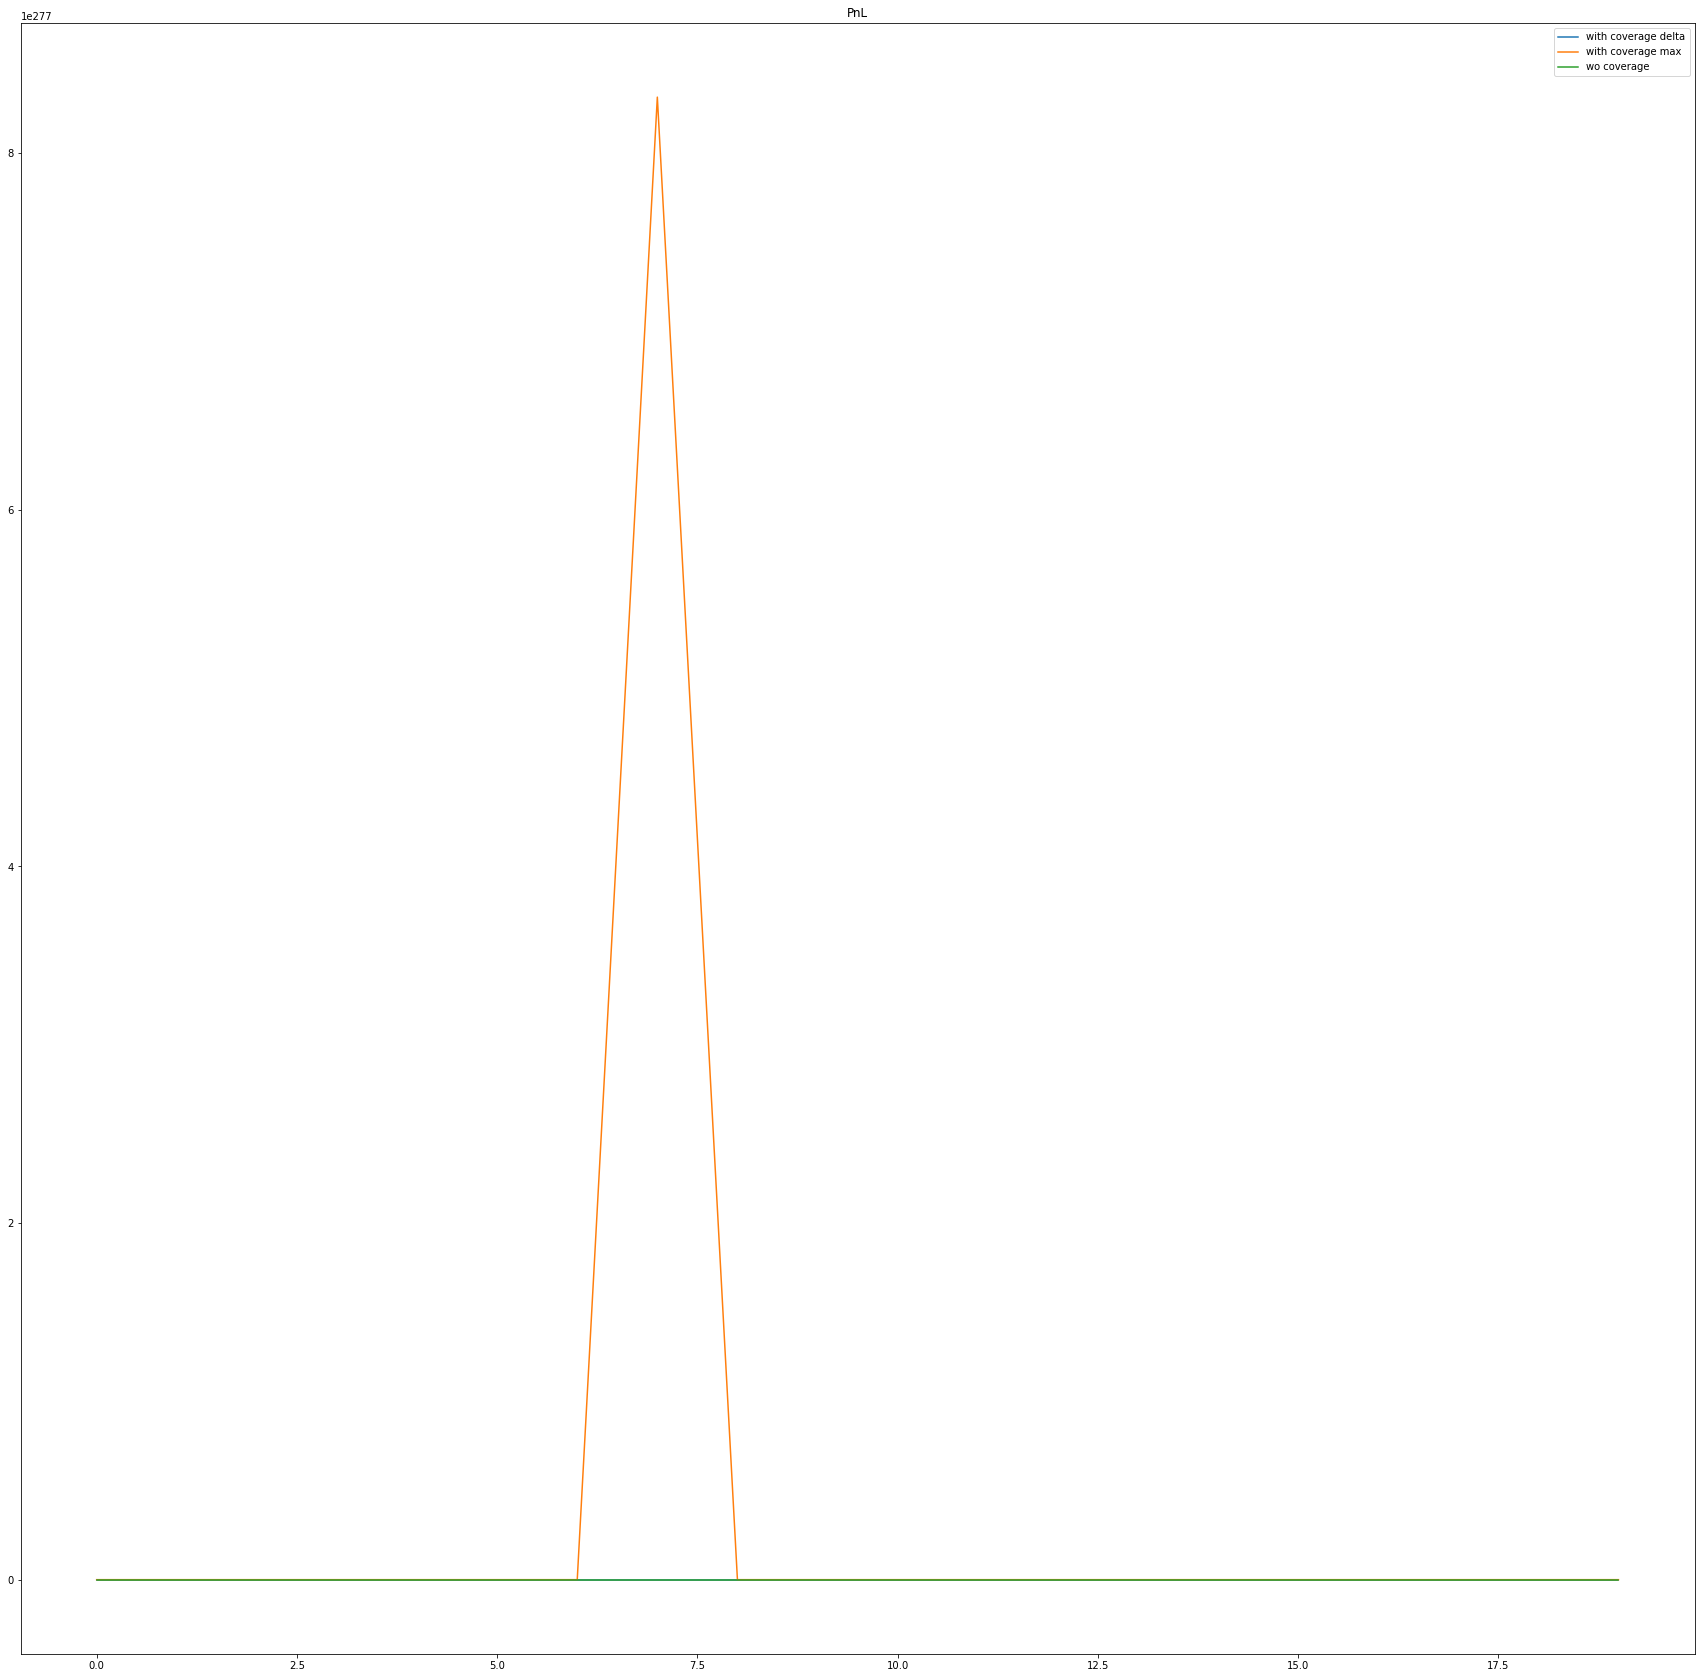

In [207]:
plt.figure(figsize = (30,30))
plt.plot(pnl_covered)
plt.plot(pnl_covered__max)
plt.plot(pnl_wo_cov)
plt.legend(['with coverage delta','with coverage max', 'wo coverage'])
plt.title('PnL')

# Question 8

In [162]:
df = pd.DataFrame()
df['PNL Delta'] = pnl_covered
df['PNL Maximisation'] = pnl_covered__max
df = df.rename_axis('Trajectories')
df

,PNL Delta,PNL Maximisation
Trajectories,,
0,346380.207,-1.187213e+45
1,356984.245,3.843066e+13
2,147376.967,-5.033925e+163
3,356987.318,8.657599e+256
4,356981.082,2.075116e+33
5,356985.143,-1.423473e+75
6,187982.810,2.968815e+206
7,353586.269,8.313292e+277
8,356977.816,9.590443e+58
